# Fill That Cart!

# Introduction

Instacart is a grocery delivery platform where customers can place orders and have them delivered, similar to Uber Eats or DoorDash. The dataset provided here is a modified version of the original. Its size was reduced to speed up computations, and missing values and duplicates were intentionally introduced. Care was taken to preserve the original data distributions when making these changes.


# Data Dictionary

The dataset contains five tables. <br>
Below is a data dictionary listing each table’s columns and describing the data they contain.
instacart_orders.csv: Each row corresponds to an order placed through the Instacart app.

- `instacart_orders.csv`
    - `'order_id'`: unique ID number identifying each order.
    - `'user_id'`: unique ID number identifying each customer account.
    - `'order_number'`: the number of times this customer has placed an order.
    - `'order_dow'`: day of the week the order was placed (0 = Sunday).
    - `'order_hour_of_day'`: hour of the day the order was placed.
    - `'days_since_prior_order'`: number of days since this customer’s previous order.
- `products.csv`
    - `'product_id'`: unique ID number identifying each product.
    - `'product_name'`: name of the product.
    - `'aisle_id'`: unique ID number identifying each grocery aisle category.
    - `'department_id'`: unique ID number identifying each grocery department.
- `order_products.csv` 
    - `'order_id'`: unique ID number identifying each order.
    - `'product_id'`: unique ID number identifying each product.
    - `'add_to_cart_order'`: sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`
    - `'aisle_id'`: unique ID number identifying each grocery aisle category.
    - `'aisle'`: name of the aisle.
- `departments.csv`
    - `'department_id'`: unique ID number identifying each grocery department.
    - `'department'`: name of the department.


# Step 1. Data Description
Read the data files (instacart_orders.csv, products.csv, aisles.csv, departments.csv, and order_products.csv) using pd.read_csv() with the appropriate parameters to ensure correct data loading. Verify the information for each created DataFrame.


In [7]:
# import: 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Extract the info from .csv files
df_instacart_orders = pd.read_csv('instacart_orders.csv', sep= ';')
df_products = pd.read_csv('products.csv', sep= ';')
df_aisles = pd.read_csv('aisles.csv', sep= ';')
df_departments = pd.read_csv('departments.csv', sep= ';')
df_order_products = pd.read_csv('order_products.csv', sep= ';')

In [9]:
# Show the info contained in file "orders", and show the null data sum
df_instacart_orders.info()
print()
df_instacart_orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [10]:
# Show the info contained in file "products", and show the null data sum
df_products.info()
print()
df_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [11]:
# Show the info contained in file "aisles", and show the null data sum
df_aisles.info()
print()
df_aisles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



aisle_id    0
aisle       0
dtype: int64

In [12]:
# Show the info contained in file "departments", and show the null data sum
df_departments.info()
print()
df_departments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes



department_id    0
department       0
dtype: int64

In [13]:
# Show the info contained in file "order_products", and show the null data sum
df_order_products.info(show_counts=True)
print()
df_order_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

## Conclusions

At first glance (before displaying the information with .info()), everything seemed fine. However, after examining the first dataset (df_instacart_orders), I noticed that the .csv files were separated by semicolons (;) instead of commas, as is usually the case with this format. <br>
After checking the other datasets, I confirmed that the same issue was present in all of them. I then proceeded to import the datasets using the semicolon (;) as the separator, and once the information was displayed, the columns appeared correctly.

Analyzing each dataset:
- df_instacart_orders: The data in the columns are of type int64, except for the column days_since_prior_order, which contains null values.
- df_products: The column product_name is the only one with null values and has a data type of object; the remaining columns are of type int64
- df_aisles: All columns contain complete data. Data types are object and int64.
- df_departments: All columns contain complete data. Data types are object and int64.
- df_order_products: The column add_to_cart_order contains null values and is of type float64. The remaining columns have complete data and are of type int64.

# Step 2. Data Preprocessing

The data preprocessing was carried out as follows:
- Verification and correction of data types.
- Identification of missing values.
- Identification and removal of duplicate values.
- Detection and elimination of duplicates (including an explanation of the decision-making process).

Look for duplicate values, and validate if need to be removed. 

### orders data frame

In [14]:
# Reviewing if there's duplicate values
duplicados_totales = df_instacart_orders.duplicated().sum()
print(f"the duplicate rows are: {duplicados_totales}")
print()

# Now, reviewing duplicated rows 
print(df_instacart_orders[df_instacart_orders.duplicated()])

the duplicate rows are: 15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   1832

Do you have duplicate rows? If so, what do they have in common? <br>
<br>
Yes, there are duplicate rows — a total of 15. <br>
After printing the rows, I noticed a common pattern in two columns: <br>

- order_dow: 3, where 0 (according to the description) represents Sunday. Therefore, the repeated value across all duplicate rows corresponds to Wednesday.
- order_hour_of_day: 2, following the 24-hour format starting at 0 (midnight), which means 2 a.m.

In [15]:
# based on your findings, verify orders made on Wednesday at 2:00am
pedidos_miercoles_2am = df_instacart_orders[
    (df_instacart_orders['order_dow'] == 3) &
    (df_instacart_orders['order_hour_of_day'] == 2)
]

# print(pedidos_miercoles_2am.head(10))
# print(pedidos_miercoles_2am.tail(10))
print(pedidos_miercoles_2am.sample(10))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
371905    391768    57671            19          3                  2   
314427   1286742   183220            48          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
108281   2218116    35918             9          3                  2   
242618   1021560    53767             3          3                  2   
197305   1135733   110438            15          3                  2   
346889   2291746    40940             7          3                  2   
30371    1918001   188546            14          3                  2   
411408   1286742   183220            48          3                  2   

        days_since_prior_order  
371905                    10.0  
314427                     4.0  
321100                    18.0  
394347                     2.0  
108281                     8.0 

What does this result suggest? <br>
It suggests that the duplicated rows are indeed redundant data that do not add value to the table. Therefore, it would be worthwhile to remove them in order to maintain a more accurate and reliable dataset.

In [16]:
# Eliminate duplicate values
print('number of duplicated rows at the beginning: ', df_instacart_orders.duplicated().sum())
df_instacart_orders = df_instacart_orders.drop_duplicates()
df_instacart_orders.reset_index(drop=True)

number of duplicated rows at the beginning:  15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [17]:
# Verify if there's duplicated rows
print('number of duplicated rows at the end: ', df_instacart_orders.duplicated().sum())

number of duplicated rows at the end:  0


In [18]:
# Now, verify if there's only, duplicated order ID's
print('number of duplicate values in column "order_id": ', df_instacart_orders['order_id'].duplicated().sum())

number of duplicate values in column "order_id":  0


Findings: <br>
<br>
According to the dataset (instacart_orders.csv) and the column descriptions, the “order_id” should represent a unique order number. Therefore, any duplicate values in this column indicate incorrect or invalid data. <br>
<br>
First, I used the .duplicates.sum() method and identified 15 duplicate rows, noticing a pattern in two columns: “order_dow” = 3, which corresponds to Wednesday, and “order_hour_of_day” = 2, which corresponds to 2 a.m. <br>
I then applied the drop_duplicates method and reassigned the result to the DataFrame, successfully removing the duplicate rows that added no value to the table. If left undetected, these could have led to inaccurate calculations in later analyses. <br>
Finally, I printed the “order_id” column and the cleaned dataset to verify that all duplicate values had been effectively removed.

### Products data frame

In [19]:
# Verify if there's duplicated rows
print('the number of duplicated rows is: ', df_products.duplicated().sum())

the number of duplicated rows is:  0


In [20]:
# Review if there's only duplicated product ID's
print('the number of duplicated values in "product_id" is: ', df_products['product_id'].duplicated().sum())

# print(df_products['product_id'].head(5))

the number of duplicated values in "product_id" is:  0


In [21]:
# Review if there's duplicated name orders (changing name to uppercase to compare)
df_products['product_name_uppercase'] = df_products['product_name'].str.upper()
duplicate_names = df_products['product_name_uppercase'].duplicated().sum()

# null_names = df_products['product_name'].isnull().sum()
# print('la cantidad de nombres de producto nulos son: ', null_names)
# print()
print('the number of duplicated name orders is: ', duplicate_names)

the number of duplicated name orders is:  1361


In [22]:
# Review if there's a duplicated not null product names
# Paso 1: Filter only by not null names
products_with_name = df_products[df_products['product_name'].notna()]
print(f"the number of products with name is: {len(products_with_name)}")

# Paso 2: Change to uppercase so we can compare
products_with_name_upper = products_with_name['product_name'].str.upper()

# Paso 3: Look for duplicates
duplicate_with_names = products_with_name_upper.duplicated().sum()
print('the number of duplicated not null product names is: ', duplicate_with_names)

the number of products with name is: 48436
the number of duplicated not null product names is:  104


Findings <br>
<br>
When analyzing the products.csv dataset, I first checked whether there were any duplicate rows. In this case, there were none. <br>
I then verified the “product_id” column and found no duplicate values. However, in the “product_name” column, there could be hidden implicit duplicates. To address this, I converted all product names to uppercase for better comparison. <br>
<br>
Here are the results for the “product_id” column: <br>
- Number of duplicate product names: 1,361
- Number of null product names: 1,258
- Number of products with names: 48,436
- Number of duplicate names among non-null products: 104 <br>

In conclusion, I found that some product names were missing, and after standardizing names to uppercase to correct possible implicit duplicates, only 104 duplicate product names remained among products with valid names. This allows the data exploration process to continue with cleaner information.

### departments data frame

In [23]:
# Review if there's duplicated rows
print('the number of duplicated rows is: ', df_departments.duplicated().sum())

the number of duplicated rows is:  0


In [24]:
# Review if there's duplicated department IDs
print('the number of department duplicated IDs is: ', df_departments['department_id'].duplicated().sum())

the number of department duplicated IDs is:  0


Findings <br>
<br>
By checking both the complete rows and the IDs, I confirmed that there are no duplicate data. In the case of the “department_id” column, its unique nature prevents any duplicate values from existing. Therefore, if there are no duplicates in that column, there should be no duplicate rows in the dataset.

### aisles data frame

In [25]:
# Review if there's duplicated rows
print('the number of duplicated rows is: ', df_aisles.duplicated().sum())

the number of duplicated rows is:  0


In [26]:
# Review if there's duplicated aisle IDs
print('the number of department aisle IDs is: ', df_aisles['aisle_id'].duplicated().sum())

the number of department aisle IDs is:  0


Findings <br>
By checking both the complete rows and the IDs, I verified that there are no duplicate data. In the case of the “aisle_id” column, its unique nature prevents any duplicate values from existing. Therefore, if there are no duplicates in that column, there should be no duplicate rows in the dataset.

order_products data frame

In [27]:
# Review if there's duplicated rows
print('the number of duplicated rows is: ', df_order_products.duplicated().sum())

the number of duplicated rows is:  0


In [28]:
# Recheck for any other misleading duplicates
# Here we check for duplicates by combining the columns "add_to_cart_order" and "order_id"
duplicates_cart_orderid = df_order_products.duplicated(subset=['add_to_cart_order', 'order_id']).sum()
print('The number of duplicates combining columns "add_to_cart_order" and "order_id" is: ', duplicates_cart_orderid)
print()

# Here we check for duplicates by combining the columns "product_id" and "order_id"
# duplicates_cart_orderid = df_order_products.duplicated(subset=['product_id', 'order_id']).sum()
# print('The number of duplicates combining columns "product_id" and "order_id" is: ', duplicates_cart_orderid)

# Here we check for duplicates by combining the columns "order_id", "product_id", and "reordered"
# duplicates_columns = df_order_products.duplicated(subset=['reordered', 'order_id', 'product_id']).sum()
# print('The number of duplicates combining columns "reordered", "order_id", and "product_id" is: ', duplicates_columns)

# Here we check for duplicates by combining the columns "order_id", "product_id", and "add_to_cart_order"
duplicates_order_product_cart = df_order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order']).sum()
print('The number of duplicates combining columns "order_id", "product_id", and "add_to_cart_order" is: ', duplicates_order_product_cart)

The number of duplicates combining columns "add_to_cart_order" and "order_id" is:  766

The number of duplicates combining columns "order_id", "product_id", and "add_to_cart_order" is:  0


Findings: <br>
We started by checking whether there were any completely duplicated rows and confirmed that none existed.

To detect any misleading or inconsistent data, I began by combining the unique order number “order_id” with the sequential order “add_to_cart_order.” This seemed like a good starting point, as this combination implies that within the same unique order, each product added to the cart should have a unique sequence number.

After exploring the analysis further, I concluded that it was worthwhile to include the “product_id” column in the combination, as it helps determine whether the same product appears more than once with the same sequence number within a single order.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

- La columna 'product_name' de la tabla products.
- La columna 'days_since_prior_order' de la tabla orders.
- La columna 'add_to_cart_order' de la tabla order_productos.

### products data frame

In [29]:
# Find missing values in the 'product_name' column
product_name_null = df_products[df_products['product_name'].isnull()]
print("Products without a name:", len(product_name_null))
print()
print(product_name_null.sample(15))
# print(product_name_null.head(15))
# print(product_name_null.tail(15))

Products without a name: 1258

       product_id product_name  aisle_id  department_id product_name_uppercase
45411       45412          NaN       100             21                    NaN
2161         2162          NaN       100             21                    NaN
11064       11065          NaN       100             21                    NaN
5550         5551          NaN       100             21                    NaN
30522       30523          NaN       100             21                    NaN
37259       37260          NaN       100             21                    NaN
31774       31775          NaN       100             21                    NaN
14052       14053          NaN       100             21                    NaN
42879       42880          NaN       100             21                    NaN
44558       44559          NaN       100             21                    NaN
5306         5307          NaN       100             21                    NaN
28661       28662    

Findings <br>
<br>
I checked the total number of null values in the “product_name” column. <br>
When exploring the null data, I noticed a pattern where “aisle_id” = 100 and “department_id” = 21. <br>
I reviewed the first rows (head), the last rows (tail), and random samples (sample), and in all cases, the same pattern was repeated.

In [30]:
# Are all missing product names related to the aisle with ID 100?
product_name_null_aisle_100 = product_name_null[product_name_null['aisle_id'] == 100]
all_aisle_100 = (product_name_null['aisle_id'] == 100).all()
print(f"Are all products without a name in aisle 100? {all_aisle_100}")

Are all products without a name in aisle 100? True


Findings <br>
<br>
I filtered the “aisle_id” column for the value 100. Then, I added a line to return True/False indicating whether the products without a name belong to aisle 100. In this case, the result is True.

In [31]:
# Are all missing product names related to the department with ID 21?
product_name_null_department_21 = product_name_null[product_name_null['department_id'] == 21]
all_department_21 = (product_name_null['department_id'] == 21).all()
print(f"Are all products without a name in department 21? {all_department_21}")

Are all products without a name in department 21? True


In [32]:
# Use the department and aisle tables to review the data for aisle ID 100 and department ID 21.
tables_department_aisle = df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)]
print(tables_department_aisle.head())

     product_id product_name  aisle_id  department_id product_name_uppercase
37           38          NaN       100             21                    NaN
71           72          NaN       100             21                    NaN
109         110          NaN       100             21                    NaN
296         297          NaN       100             21                    NaN
416         417          NaN       100             21                    NaN


Findings <br>
<br>
Reviewing the list, these could correspond to non-existent aisles and/or departments, since none of the rows contain information in "product_name." Alternatively, it may simply be that for that aisle and/or department, there is no "product_name" information available.

In [33]:
# fill missing product names with 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

### orders data frame

In [34]:
# Find null values
print(df_instacart_orders.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [35]:
# Are there any missing values that are not the customer's first order?
order_name_null = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isnull()]
print(order_name_null.head(10))

     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   
111   2651928   142920             1          0                 14   
118    174214   148907             1          1                  8   
147   2439694    99710             1          6                 10   
157   1330993   138895             1          4                  6   
158   2835610   195350             1          6                 19   

     days_since_prior_order  
28                      NaN  
96                      NaN  
100                     NaN  
103                     NaN  
104                     NaN  
111                     NaN  
118                

### order_products data frame

In [36]:
# Find null values
print(df_order_products.isnull().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# What are the minimum and maximum values in this column?
print(f"The minimum value of the 'add_to_cart_order' column is: {df_order_products['add_to_cart_order'].min()}")
print(f"The maximum value of the 'add_to_cart_order' column is: {df_order_products['add_to_cart_order'].max()}")

The minimum value of the 'add_to_cart_order' column is: 1.0
The maximum value of the 'add_to_cart_order' column is: 64.0


Findings <br>
<br>
The isnull method was used to identify which column contains null values. In this case, it is "add_to_cart_order". I then calculated the maximum value (64) and the minimum value (1). In conclusion, there are no zero values — those could be interpreted as null values.

In [38]:
# Save all order IDs that have a missing value in 'add_to_cart_order'
cart_null_values = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(cart_null_values)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [39]:
#Do all orders with missing values have more than 64 products?
#Group all orders with missing data by their order ID.
#Count the number of 'product_id' in each order and check the minimum count value.

filtered_order_products = df_order_products[df_order_products['order_id'].isin(cart_null_values)]
product_counts_per_order = filtered_order_products.groupby('order_id').size()
print(f"The minimum value in the 'add_to_cart_order' column is: {product_counts_per_order.min()}")
# print(f"The maximum value in the 'add_to_cart_order' column is: {product_counts_per_order.max()}")

The minimum value in the 'add_to_cart_order' column is: 65


Findings <br>
<br>
In this case, all orders with missing values do indeed have more than 64 items. Using groupby, all orders with missing data were grouped by their order_id. Finally, I calculated the min and max values to verify the range of orders.

In [40]:
# Replace the missing values in the 'add_to_cart_order' column with 999 and convert the column to integer type.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


### Conclusion

After carrying out the data filtering process to identify missing or null values and duplicates (making sure to distinguish real duplicates from “false duplicates”), the dataset was successfully cleaned and prepared for analysis. <br>
During the data cleaning process, specific patterns were observed — for example, in instacart_orders, duplicate data appeared in aisle 100 and department 21; and in order_products, the null values showed a pattern related to the number of products per order.

# Step 3. Data Analysis
Once the data is processed and ready, perform the following analysis:

## [A] Initial Checks

Verify that the values in the columns 'order_hour_of_day' and 'order_dow' in the orders table are reasonable (i.e., 'order_hour_of_day' ranges between 0 and 23, and 'order_dow' ranges between 0 and 6).
- Create a chart showing the number of people placing orders depending on the time of day.
- Create a chart showing which day of the week people make their purchases.
- Create a chart showing how long people wait before placing their next order, and comment on the minimum and maximum values.


### [A1] Verify sensitive values

In [41]:
print(np.sort(df_instacart_orders['order_hour_of_day'].unique()))
print()
print(np.sort(df_instacart_orders['order_dow'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

[0 1 2 3 4 5 6]


Conclusions: <br>
Indeed, both "order_hour_of_day" and "order_dow" are sensitive values. They fluctuate within their expected patterns.

### [A2] For each hour of the day, how many people place orders?

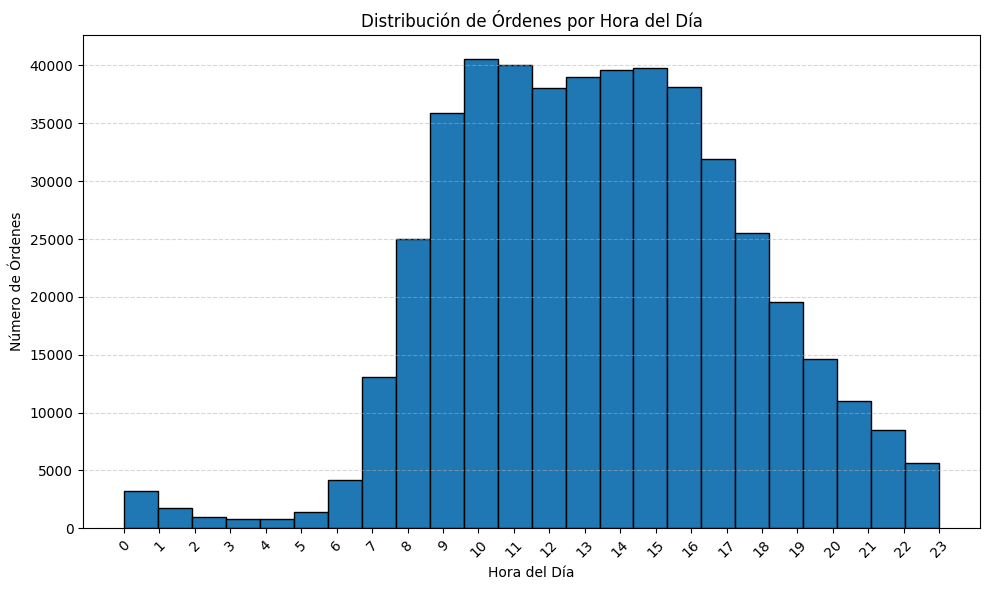

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df_instacart_orders['order_hour_of_day'], bins=24, edgecolor='black')
plt.title("Distribución de Órdenes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Órdenes")
plt.xticks(range(24), rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Conclusions: <br>
<br>
To create the chart, I first had to group the data from the columns "order_hour_of_day" and "order_id" using groupby. This allowed me to obtain the total number of orders placed per hour across the 24-hour range represented in the "order_hour_of_day" column.
The x-axis represents the hours, and the y-axis represents the number of orders. I used a histogram because it is visually appealing and easy to understand.

### [A3] On which day of the week do people buy groceries?

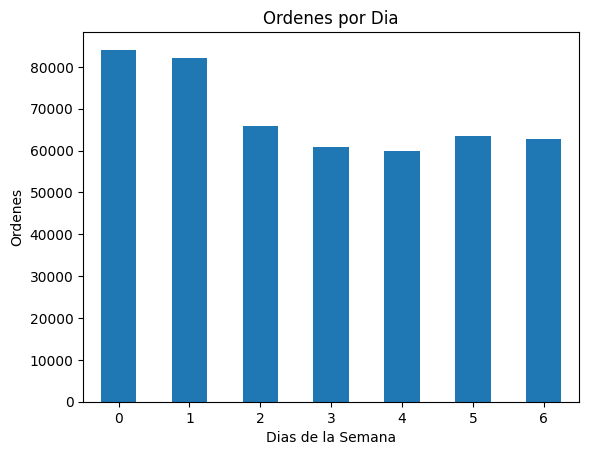

In [43]:
ordenes_por_dia = df_instacart_orders.groupby('order_dow')['order_id'].count()
ordenes_por_dia = ordenes_por_dia.sort_index()

ordenes_por_dia.plot(
    title= "Ordenes por Dia",
    kind= 'bar',
    x= 'order_dow',
    y= 'order_id',
    xlabel= 'Dias de la Semana',
    ylabel= 'Ordenes',
    rot= 0
)

plt.show()

Conclusions: <br>
<br>
To create the chart, I first had to group the data from the columns "order_dow" and "order_id" using groupby. This allowed me to obtain the total number of orders placed per day, within the 24-hour range represented in the "order_hour_of_day" column.
The x-axis represents the days, and the y-axis represents the number of orders. I used a bar chart because it is visually appealing and easy to understand.

### [A4] How long do people wait before placing another order?

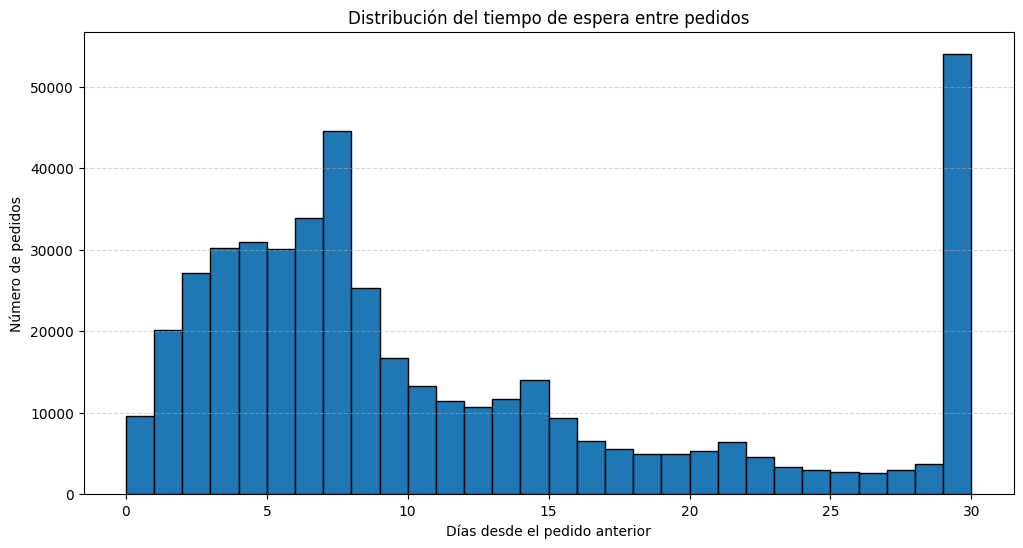

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df_instacart_orders['days_since_prior_order'], bins=30, edgecolor='black')
plt.title('Distribución del tiempo de espera entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Conclusions: <br>
<br>
We can clearly see a distinction between customers who shop very frequently—those close to 0 days since their last purchase—and those who wait up to 30 days before ordering again.
There is a slight upward trend between days 0 and 8, after which the graph shows a steady decline up to day 30.
This could indicate that Instacart customers tend to fall into two main groups: those who purchase very regularly and those who wait around 30 days before making another order.

## [B] Intermediate

Is there any difference between the ‘order_hour_of_day’ distributions for Wednesdays and Saturdays? Plot bar charts of ‘order_hour_of_day’ for both days in the same figure and describe any differences you observe. <br>
Plot the distribution for the number of orders placed by customers (that is, how many customers made only 1 order, how many made 2, 3, and so on). <br>
<br>
Which are the top 20 most frequently ordered products (show their IDs and names)?

### [B1] Difference between Wednesdays and Saturdays for ‘order_hour_of_day’.

In [45]:
miercoles = df_instacart_orders[df_instacart_orders['order_dow'] == 3] 
miercoles_horas = miercoles['order_hour_of_day'].value_counts()

In [46]:
sabado = df_instacart_orders[df_instacart_orders['order_dow'] == 6]
sabado_horas = sabado['order_hour_of_day'].value_counts()

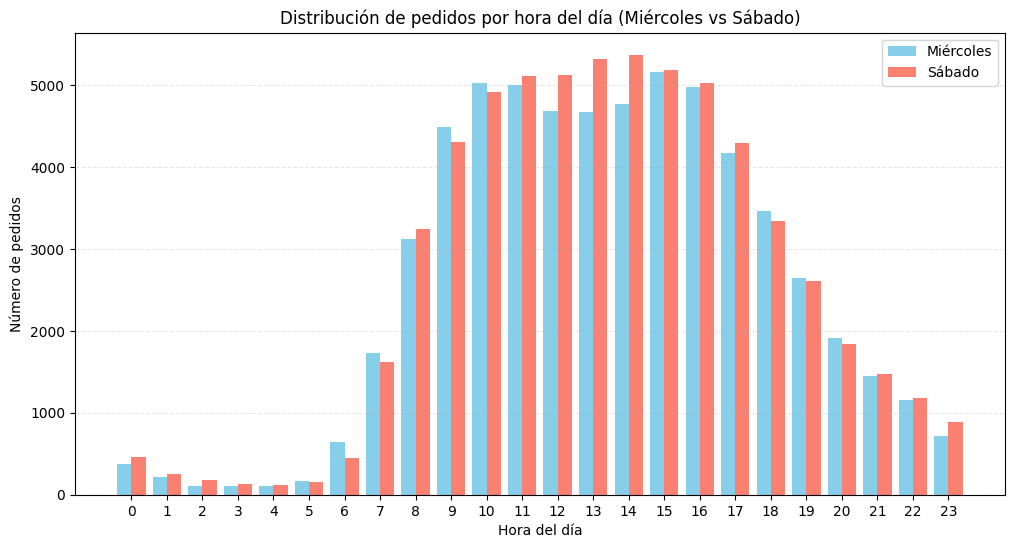

In [47]:
plt.figure(figsize=(12,6))
plt.bar(miercoles_horas.index - 0.2, miercoles_horas.values, width=0.4, label='Miércoles', color='skyblue')
plt.bar(sabado_horas.index + 0.2, sabado_horas.values, width=0.4, label='Sábado', color='salmon')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Conclusions: <br>
<br>
For the final histogram comparing orders by hour between Wednesday and Saturday, we can observe a strong similarity in the hourly patterns. Analyzing by hour, there is a clear peak between 10 AM and 4 PM on both days. Both the high-activity periods and the low-order moments are quite similar for both days.

### [B2] What is the distribution of the number of orders per customer?

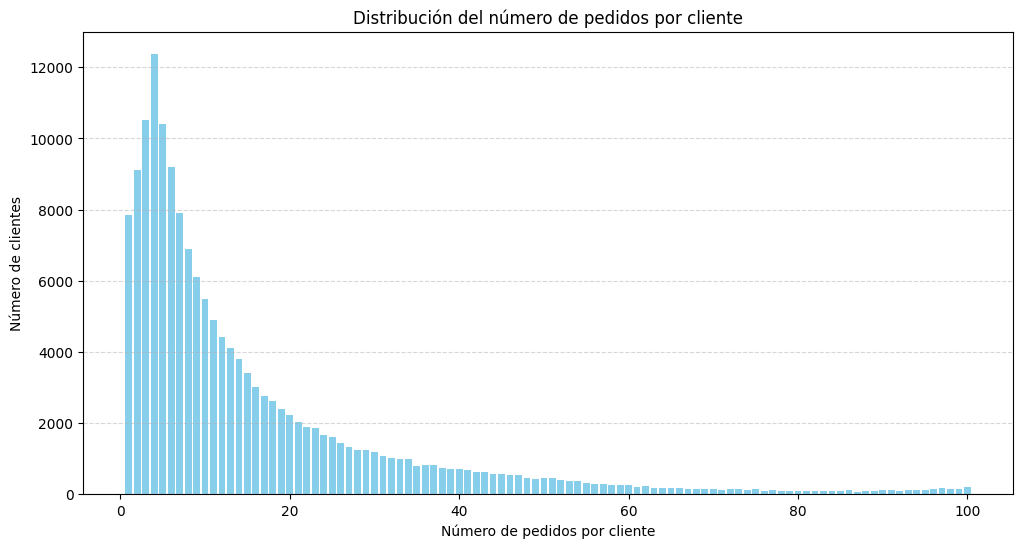

In [48]:
pedidos_por_usuario = df_instacart_orders.groupby('user_id')['order_number'].max()
distribucion = pedidos_por_usuario.value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(distribucion.index, distribucion.values, color='skyblue')
plt.xlabel('Número de pedidos por cliente')
plt.ylabel('Número de clientes')
plt.title('Distribución del número de pedidos por cliente')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Conclusions: <br>
<br>
We can observe a high frequency from orders 1 to 4. From that point onward, the curve tends to decrease, reaching very few orders and remaining low toward the end of the chart. This could indicate that a small number of customers tend to make large purchases, while the highest peaks correspond to customers placing between 1 and 4 orders.

### [B3] Which are the 20 most popular products (show their ID and name)?

In [49]:
# How many times each product_id appears 
productos_populares = df_order_products['product_id'].value_counts().head(20)

In [50]:
# Convert the series to Dataframe
productos_populares = productos_populares.reset_index()
productos_populares.columns = ['product_id', 'num_pedidos']

In [51]:
# Merge column "product_id" from dataframes "order_products" and "products"
productos_con_nombre = pd.merge(productos_populares, df_products[['product_id', 'product_name']], on='product_id')
productos_con_nombre = productos_con_nombre[['product_id', 'product_name', 'num_pedidos']]

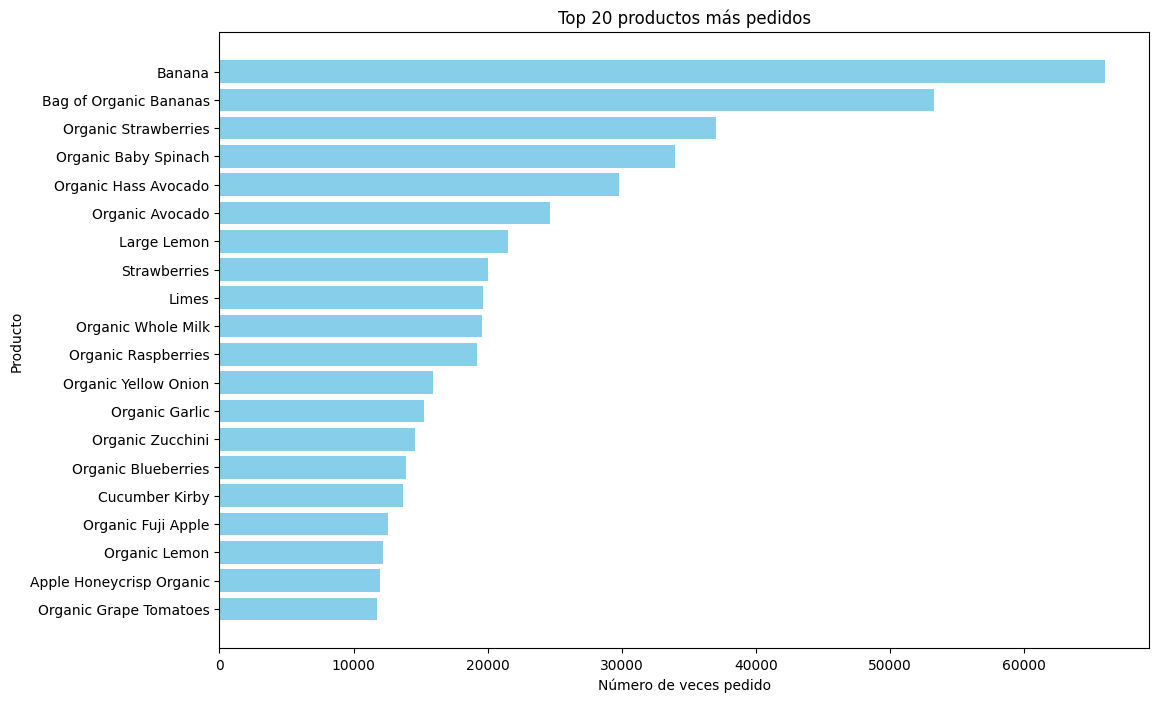

In [52]:
plt.figure(figsize=(12, 8))
plt.barh(productos_con_nombre['product_name'], productos_con_nombre['num_pedidos'], color='skyblue')
plt.xlabel('Número de veces pedido')
plt.ylabel('Producto')
plt.title('Top 20 productos más pedidos')
plt.gca().invert_yaxis()
plt.show()

Conclusions: <br>
<br>
For this part, I had to merge the product_id and product_name columns from the "products" dataset with the "instacart_orders" dataset. This allowed me to create a chart showing the top 20 most ordered products. I observed that “Banana” and “Bag of Organic Bananas” stand out with over 40,000 orders each. From 20,000 orders and up, the 11 most requested products are concentrated.

## [C] Advanced

How many items do people usually buy in one order? What does the distribution look like? <br>
What are the top 20 items that are reordered most frequently (show their product IDs and names)? <br>
For each product, what is the reorder rate (number of reorders / total orders)?<br>
For each customer, what proportion of the products they ordered had already been ordered before? Calculate the reorder rate for each user instead of for each product.<br>
What are the top 20 items people add to their carts first (show the product IDs, names, and the number of times they were the first item added to the cart)?

### [C1] How many items do people usually buy in an order? What does the distribution look like?

In [53]:
articulos_por_pedido = df_order_products.groupby('order_id')['product_id'].count()
print()
print(articulos_por_pedido.describe())


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


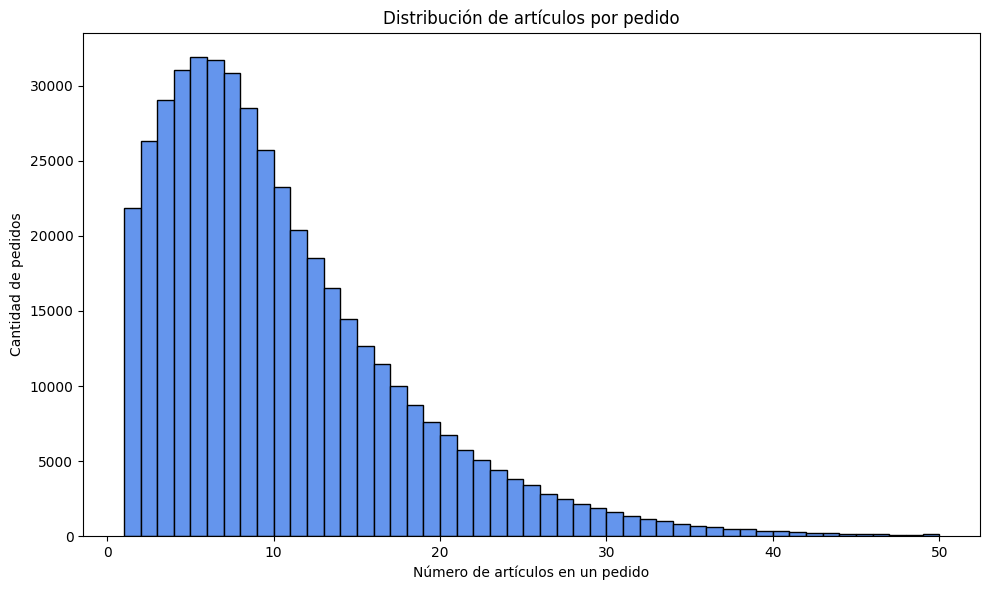

In [54]:
plt.figure(figsize=(10,6))
plt.hist(articulos_por_pedido, bins=range(1, 51), color='cornflowerblue', edgecolor='black')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos en un pedido')
plt.ylabel('Cantidad de pedidos')
plt.tight_layout()
plt.show()

Conclusions <br>
<br>
Given the trend shown in the chart, we can see that the peak occurs within the first five items per order. From there, the curve declines exponentially, stabilizing at minimal values around 40 items. This can be interpreted as a clear distinction between customers who mostly purchase up to five items and those who add more than five to their cart.

### [C2] Which are the top 20 items that are most frequently reordered (show their product names and IDs)?

In [55]:
# Filter by reordered products
productos_populares_reordenados = df_order_products[df_order_products['reordered'] == 1]

In [56]:
# count how many times appear each product_id
productos_populares_reordenados = productos_populares_reordenados['product_id'].value_counts().head(20)

In [57]:
# Convert the series to Dataframe
productos_populares_reordenados = productos_populares_reordenados.reset_index()
productos_populares_reordenados.columns = ['product_id', 'num_reorders']

In [58]:
# do the merge
top_productos_populares_reordenados = pd.merge(productos_populares_reordenados, df_products[['product_id', 'product_name']], on='product_id')

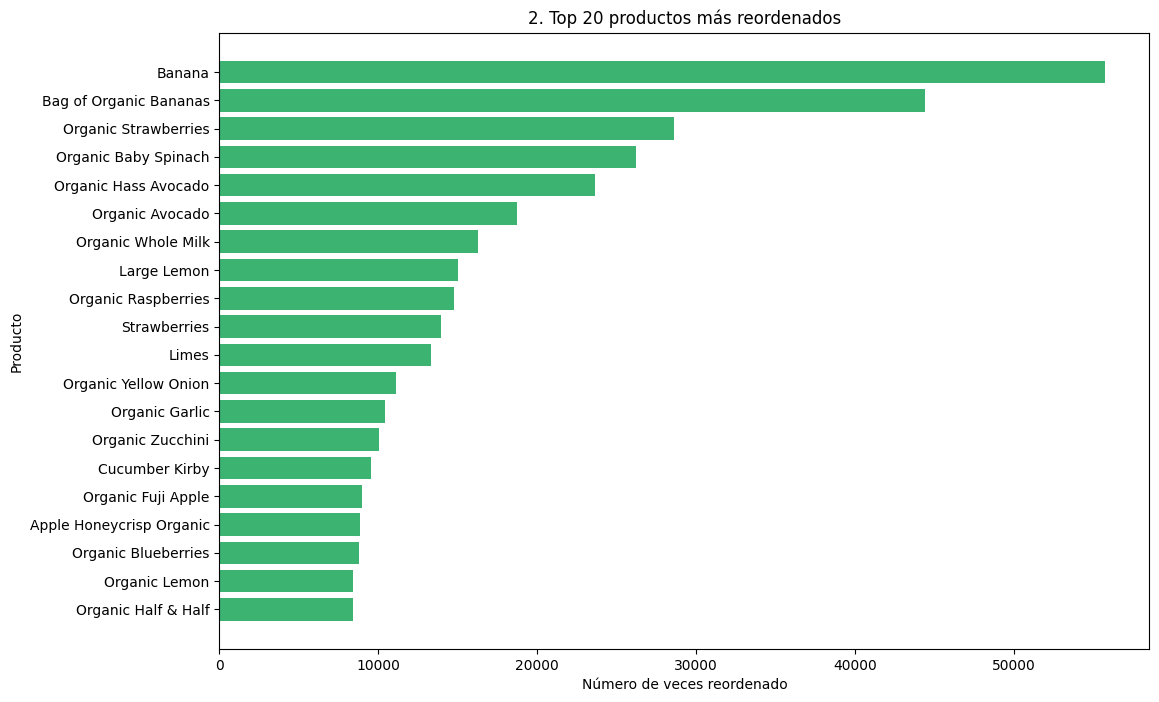

In [59]:
plt.figure(figsize=(12, 8))
plt.barh(top_productos_populares_reordenados['product_name'], top_productos_populares_reordenados['num_reorders'], color='mediumseagreen')
plt.title('2. Top 20 productos más reordenados')
plt.xlabel('Número de veces reordenado')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.show()

Conclusions <br>
<br>
Based on the chart, these are products with high customer loyalty. We can point out specific cases that appear in the same positions as in the "Top 20 Most Ordered Products" chart — such as Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado, and Organic Avocado — which remain customer favorites for both ordering and reordering.

### [C3] For each product, what is the proportion of times it is ordered and then reordered?

In [60]:
# Calculate the repeat rate per product
total_pedidos = df_order_products.groupby('product_id').size()
total_reorders = df_order_products.groupby('product_id')['reordered'].sum()
tasa_reorden_producto = (total_reorders / total_pedidos).reset_index(name='tasa_reorden')

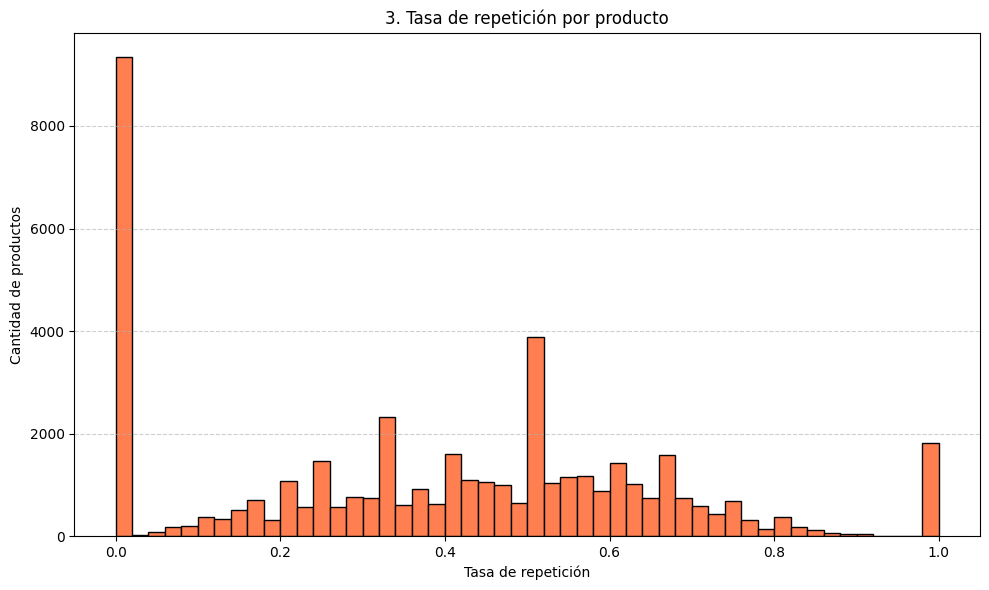

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(tasa_reorden_producto['tasa_reorden'], bins=50, color='coral', edgecolor='black')
plt.title('3. Tasa de repetición por producto')
plt.xlabel('Tasa de repetición')
plt.ylabel('Cantidad de productos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conclusions <br>
<br>
In this case, the reorder rate was calculated per product. It can be said that although many products are ordered only once, there is a small number of items with a very high reorder rate. There is a clear trend among customers not to repeat their purchases.

### [C4] For each customer, what proportion of their ordered products had they already ordered before?

In [62]:
# Merge order_products and orders to get user_id
df_merged = pd.merge(df_order_products, df_instacart_orders[['order_id', 'user_id']], on='order_id')

In [63]:
# Group by user
user_total = df_merged.groupby('user_id')['product_id'].count()
user_reordered = df_merged.groupby('user_id')['reordered'].sum()
tasa_reorden_usuario = (user_reordered / user_total).reset_index(name='tasa_reorden')

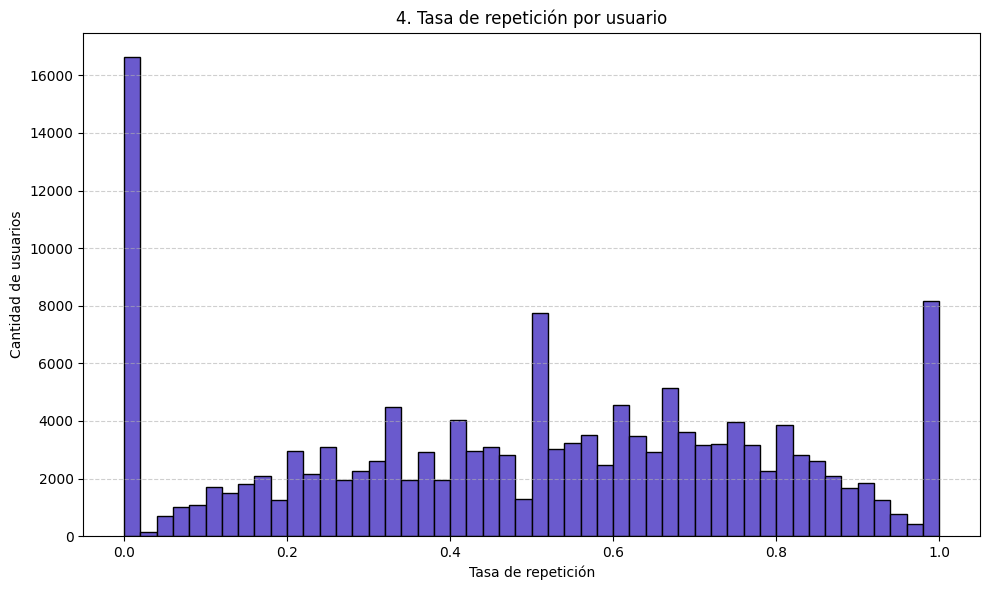

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(tasa_reorden_usuario['tasa_reorden'], bins=50, color='slateblue', edgecolor='black')
plt.title('4. Tasa de repetición por usuario')
plt.xlabel('Tasa de repetición')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conclusions <br>
<br>
Analyzing this reorder rate among customers, we can conclude that many customers tend to try new products with each order. However, there is a niche group of loyal customers who consistently repurchase certain products. It may be worthwhile to analyze these customers more deeply as part of a retention or personalization strategy aimed at them.

### [C5] What are the top 20 items that people add to their carts first?

In [65]:
# Filter by add_to_cart_order == 1
primeros_productos = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [66]:
# Count how many times each product was first ordered
top_primero = (primeros_productos['product_id'].value_counts().head(20))

In [67]:
# Convert the series to Dataframe
top_primero = top_primero.reset_index()
top_primero.columns = ['product_id', 'veces_primero']

In [68]:
# Add the name of product
top_primero = pd.merge(top_primero, df_products[['product_id', 'product_name']], on='product_id')

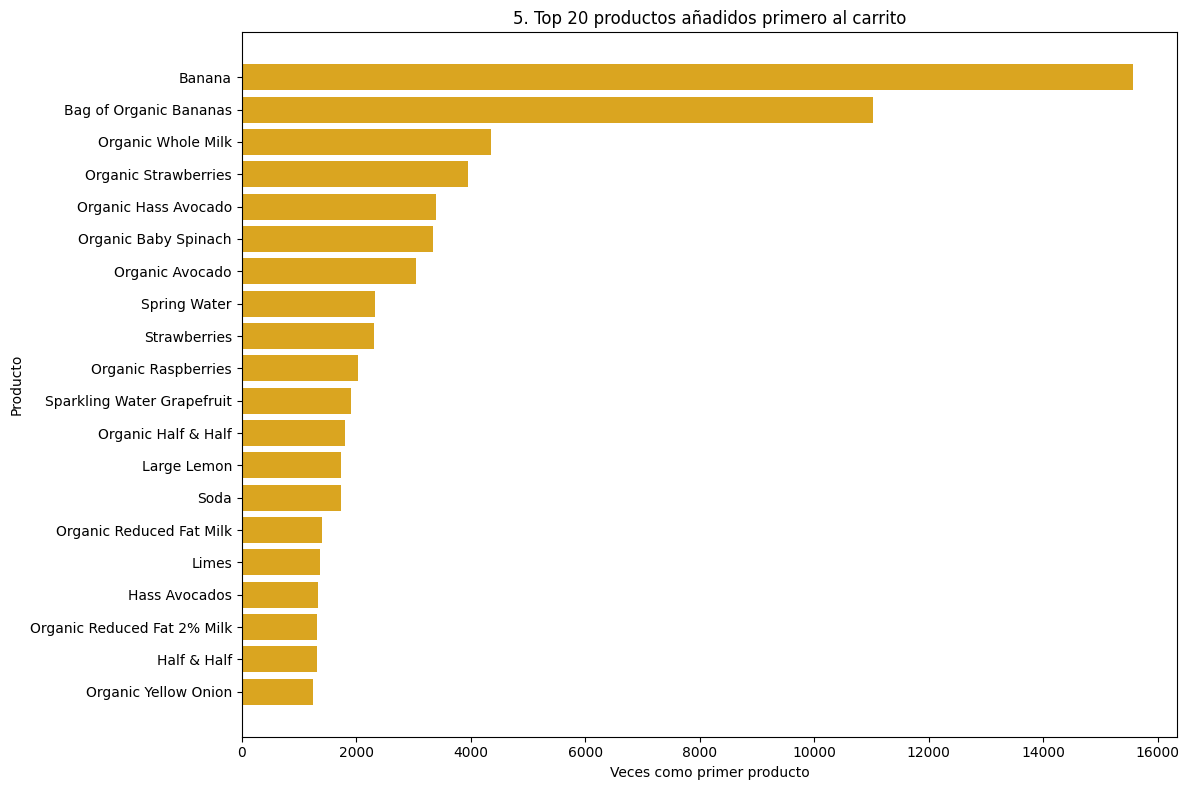

In [69]:
plt.figure(figsize=(12, 8))
plt.barh(top_primero['product_name'], top_primero['veces_primero'], color='goldenrod')
plt.title('5. Top 20 productos añadidos primero al carrito')
plt.xlabel('Veces como primer producto')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Conclusion: 

This project provided a deep exploration into consumer behavior patterns on the Instacart platform. By analyzing the five major datasets: orders, products, order_products, aisles, and departments. We successfully navigated real-world data to extract valuable and actionable insights.

Preprocessing Stage: Foundation of the Analysis <br>
<br>
The data cleaning phase was essential and revealed significant challenges. The first crucial step was identifying the correct data separator (semicolon instead of comma). Handling duplicate values was insightful: we found 15 exact duplicates in the orders table, all anomalously grouped on Wednesdays at 2 a.m., which were subsequently removed.

- Product Names: The 1,258 unnamed products (product_name) were not random; all belonged to aisle 100 and department 21 (identified as “missing” or “unknown”). These were correctly imputed as “Unknown” to maintain record integrity.
- Days Since Prior Order: The 28,817 missing values in days_since_prior_order perfectly corresponded to orders where order_number was 1 — confirming that these were new customers placing their first order, a meaningful insight on its own.
- Cart Order: The 836 missing values in add_to_cart_order were associated with exceptionally large orders (over 64 items, the observed maximum). These were imputed with an outlier value (999) for proper handling.

Exploratory Data Analysis: Discovering Key Patterns <br>
Once cleaned, the analysis revealed clear behavioral trends about when and how customers shop: <br>

- Peak Hours: Ordering activity is strongly concentrated between 10:00 a.m. and 4:00 p.m. This trend held steady across both high-demand days (like Saturday) and lower-demand days (like Wednesday).
- Purchase Frequency: A strong bimodal pattern emerged (A4). Two main customer groups were identified: a weekly segment (peaking around 7 days) and a monthly segment (peaking at 30 days).
- Order Size & Customer Loyalty: Most customers place only a few orders (1–4) (B2) and buy a small number of items per order (the peak is around 5 items) (C1). However, there is a “long tail” of highly recurrent customers who make much larger purchases.
- Reorder Behavior: The reorder analysis (C3, C4) revealed polarization — most products and users exhibit low reorder rates (favoring exploration), but there exists a loyal user segment that reorders almost all of their products in every purchase.

Global Insight: The “Anchor Product” and Customer Segmentation <br>
<br>
The most consistent finding across the entire analysis was the dominance of specific products. “Banana” and “Bag of Organic Bananas” were not only the most purchased items (B3) but also the most reordered (C2) and, crucially, the most frequently added first to the cart (C5).
This suggests that these products — along with other fresh organic items like strawberries and avocados — act as “anchor products”: primary intention items that initiate the shopping process.

In Summary: <br>
<br>
Analyzing these five datasets allowed us to identify distinct customer archetypes — weekly vs. monthly, explorers vs. loyalists, small vs. large basket shoppers. For Instacart, this translates into clear strategic opportunities:

- Interface Optimization: Highlighting anchor products (like bananas) at the start of a user session could reduce friction and increase cart conversion.
- Personalized Marketing: Users can be segmented — explorers (low reorder rate) can receive discounts on new products, while loyal customers (high reorder rate) could benefit from “quick reorder” or subscription options for their favorite items.